In [170]:
import sklearn.datasets
import sklearn.model_selection
import sklearn.linear_model
import matplotlib.pyplot as plt
import numpy as np

### Import scikit-learn's example diabetes dataset, and print a description of the dataset:

In [171]:
diabetes = sklearn.datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

- Get the feature and target arrays, and print the dimensions of x and y:

In [172]:
x = diabetes.data
y = diabetes.target
print("dimensions of x: " + str(x.shape))
print("dimensions of y: " + str(y.shape))

dimensions of x: (442, 10)
dimensions of y: (442,)


### Make several scatter plots to look at the relationship between y and the features in x

Feature 1:


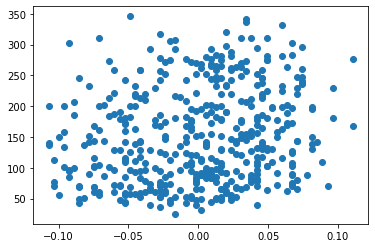

Feature 2:


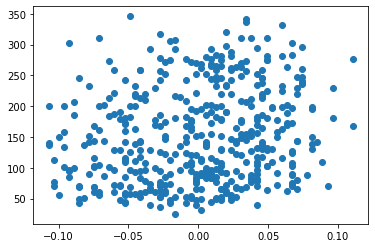

Feature 3:


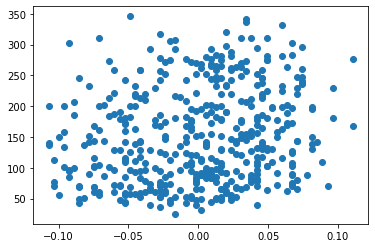

Feature 4:


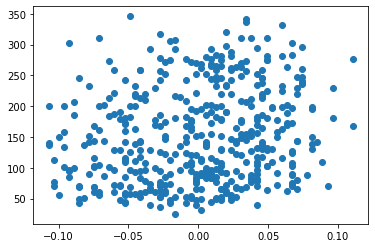

Feature 5:


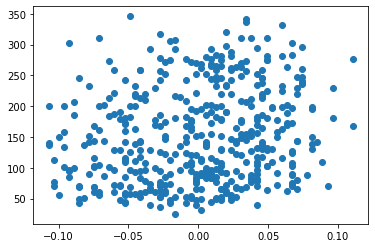

Feature 6:


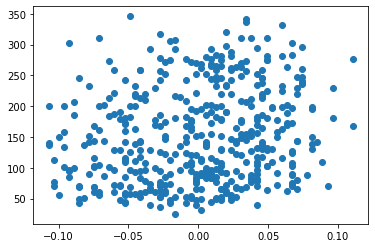

Feature 7:


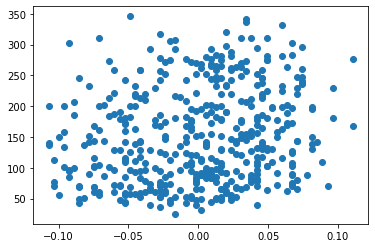

Feature 8:


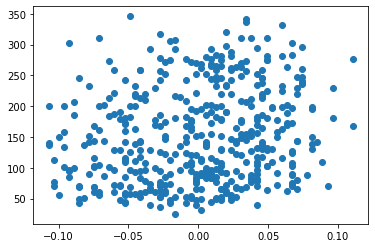

Feature 9:


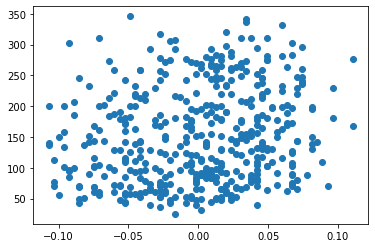

Feature 10:


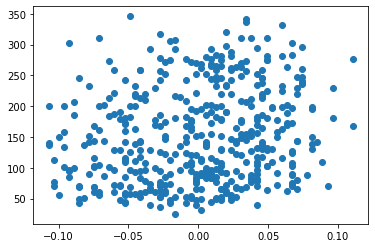

In [173]:
for i in range(10):
  print("Feature " + str(i+1) + ":")
  plt.scatter(x[:, 0], y)
  plt.show()

### Write a loop that prints the 10 correlation coefficients between y and the 10 features in x:

In [174]:
transposed_x = np.transpose(x)
for i in range(10):
    print(np.corrcoef(transposed_x[i], y))

[[1.         0.18788875]
 [0.18788875 1.        ]]
[[1.       0.043062]
 [0.043062 1.      ]]
[[1.         0.58645013]
 [0.58645013 1.        ]]
[[1.         0.44148385]
 [0.44148385 1.        ]]
[[1.         0.21202248]
 [0.21202248 1.        ]]
[[1.         0.17405359]
 [0.17405359 1.        ]]
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
[[1.         0.43045288]
 [0.43045288 1.        ]]
[[1.         0.56588343]
 [0.56588343 1.        ]]
[[1.         0.38248348]
 [0.38248348 1.        ]]


### Perform linear regression using the feature in x that has the highest correlation coefficient with y

- Split the data into a training set and a test set
- Train the model
- Print the coefficients of the model

In [175]:
x_with_one_feature = transposed_x[2]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_with_one_feature, y, test_size=0.2, random_state=42)
x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

model = sklearn.linear_model.LinearRegression()
model.fit(x_train_transformed, y_train)
b = model.intercept_
m = model.coef_[0]
print("Intercept: " + str(b))
print("Coefficient: " + str(m))

y_pred = model.predict(x_test_transformed)

Intercept: 152.00335421448224
Coefficient: 998.5776891374658


- Plot the linear model on top of a scatter plot for the training and test data

Training data plot:

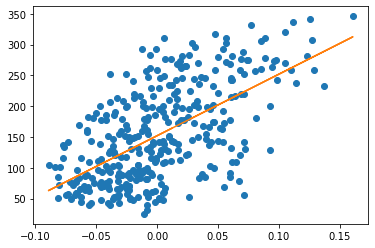

In [176]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, m*x_train+b)
plt.show()

Test data plot:

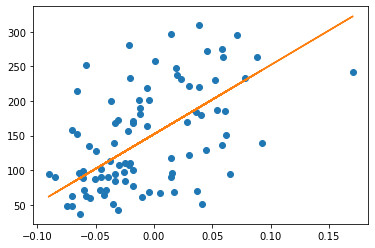

In [177]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred)
plt.show()

- Print the mean squared error and R-squared values for the model applied to the test data

In [178]:
print("Mean squared error: %.2f" % 
      sklearn.metrics.mean_squared_error(y_test, y_pred))

print("Coefficient of determination R^2: %.2f" % 
      sklearn.metrics.r2_score(y_test, y_pred))

Mean squared error: 4061.83
Coefficient of determination R^2: 0.23


### Repeat the linear regression steps, only now use all 10 features at once when doing model fitting
  
- Print the mean squared error and R-squared values for the model applied to the test data

In [179]:
x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

model2 = sklearn.linear_model.LinearRegression()
model2.fit(x_train2, y_train2)
print("Intercept: " + str(model2.intercept_))
print("Coefficients: " + str(model2.coef_))

y_pred2 = model2.predict(x_test2)

print("Mean squared error: %.2f" % 
      sklearn.metrics.mean_squared_error(y_test2, y_pred2))

print("Coefficient of determination R^2: %.2f" % 
      sklearn.metrics.r2_score(y_test2, y_pred2))

Intercept: 151.3456553477407
Coefficients: [  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Mean squared error: 2900.17
Coefficient of determination R^2: 0.45


- Compare model's results against the results obtained when training on just one feature

Linear regression with all 10 features performs significantly better (MSE reduced by 29% and R^2 improved by 96%) on prediction task on the test set compared to linear regression with only one feature.